# Lab 4. Deep Learning

## Miembros
- Fernanda Esquivel 21542
- Sofía Lam 21548

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DS-Lab-04)


In [23]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Importar dataset y mostrar imágenes

In [14]:
#Ruta base
dbPath = 'archive/PolyMNIST/MMNIST'

In [15]:
#Función para obtener imágenes y etiquetas
def loadImagesAndLabels(directorio):
    images = []
    labels = []
    for label in ['m0', 'm1', 'm2', 'm3', 'm4']:
        folder_path = os.path.join(directorio, label)
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.png'):
                img_path = os.path.join(folder_path, file_name)
                images.append(img_path)
                labels.append(label)
    return images, labels

In [16]:
#Cargar imágenes y etiquetas de entrenamiento y prueba
train_images, train_labels = loadImagesAndLabels(os.path.join(dbPath, 'train'))
test_images, test_labels = loadImagesAndLabels(os.path.join(dbPath, 'test'))

In [17]:
#Mostrar algunas imágenes del set de entrenamiento
def showImagesWithLabels(imagenes, etiquetas, n=5):
    plt.figure(figsize=(15, 7))
    for i in range(n):
        img = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Etiqueta: {etiquetas[i]}")
        plt.axis('off')
    plt.show()

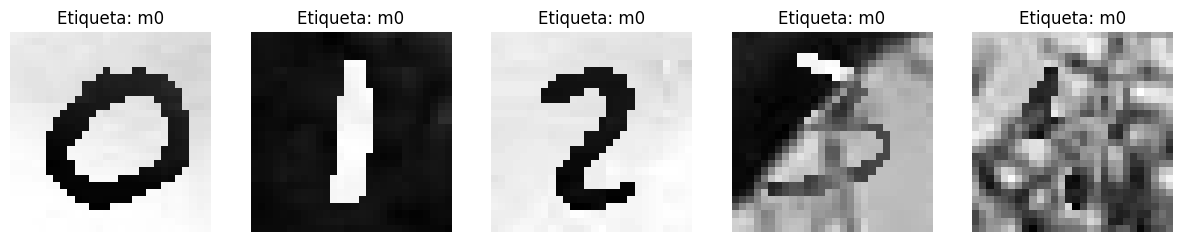

In [18]:
#Mostrar algunas imágenes de entrenamiento
showImagesWithLabels(train_images, train_labels, n=5)

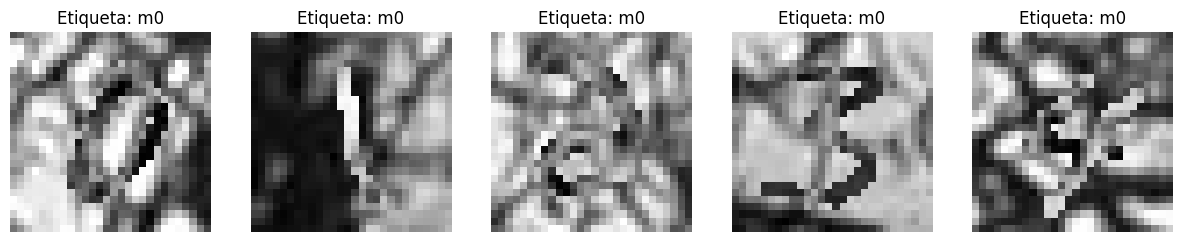

In [19]:
#Mostrar algunas imágenes de prueba
showImagesWithLabels(test_images, test_labels, n=5)

In [20]:
#Contar las etiquetas en el conjunto de entrenamiento
from collections import Counter
train_label_distribution = Counter(train_labels)
test_label_distribution = Counter(test_labels)

In [21]:
#Resultados para mostrar
train_label_distribution, test_label_distribution

(Counter({'m0': 60000, 'm1': 60000, 'm2': 60000, 'm3': 60000, 'm4': 60000}),
 Counter({'m0': 10000, 'm1': 10000, 'm2': 10000, 'm3': 10000, 'm4': 10000}))

# Análisis exploratorio

In [24]:
#Resolución de las imágenes
def getResolution(imagenes):
    resolutions = [cv2.imread(img, cv2.IMREAD_GRAYSCALE).shape for img in imagenes]
    return resolutions

In [25]:
#Obtener resolución de las imágenes de entrenamiento y prueba
train_resolutions = getResolution(train_images)
test_resolutions = getResolution(test_images)

In [26]:
#Verificar si todas las imágenes tienen la misma resolución
unique_train_resolutions = np.unique(train_resolutions, axis=0)
unique_test_resolutions = np.unique(test_resolutions, axis=0)

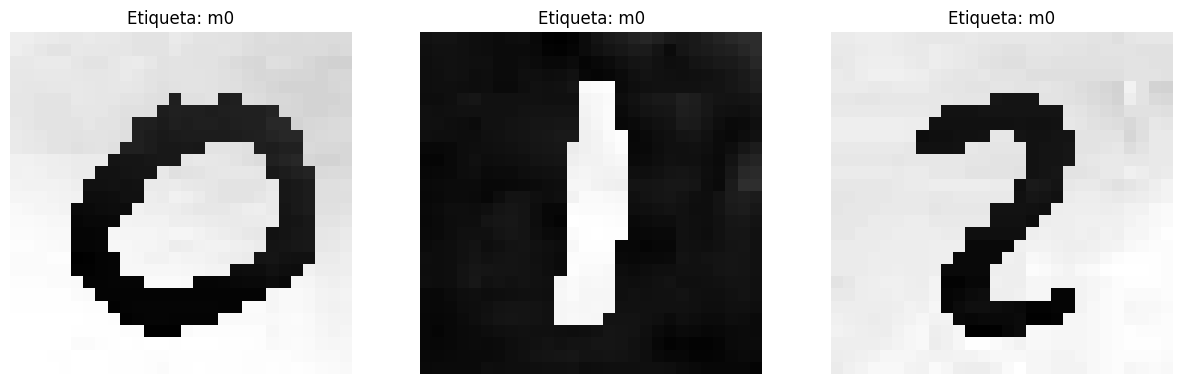

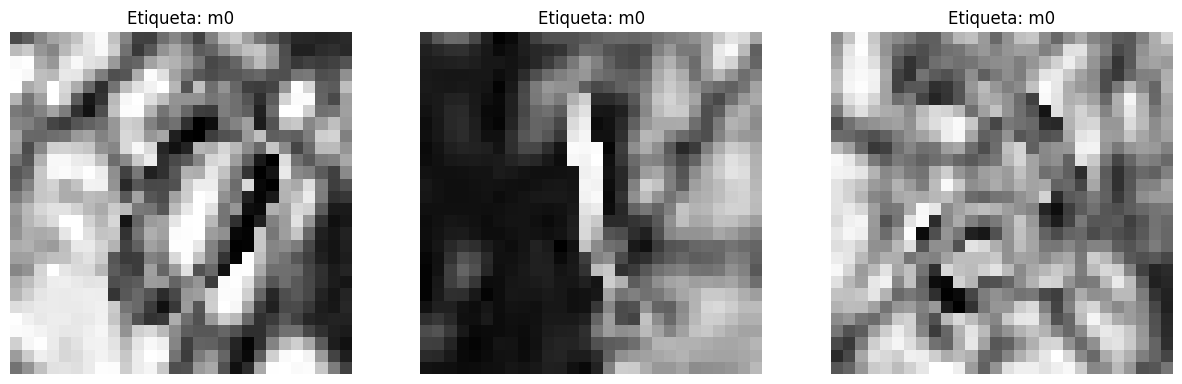

In [27]:
#Mostrar algunas imágenes de entrenamiento y prueba
showImagesWithLabels(train_images, train_labels, n=3)
showImagesWithLabels(test_images, test_labels, n=3)

In [28]:
#Graficar la distribución de etiquetas en el conjunto de entrenamiento y prueba
def plotDistribution(distribution, title):
    plt.figure(figsize=(10, 5))
    plt.bar(distribution.keys(), distribution.values(), color='blue', alpha=0.7)
    plt.xlabel('Clase')
    plt.ylabel('Número de Imágenes')
    plt.title(title)
    plt.show()

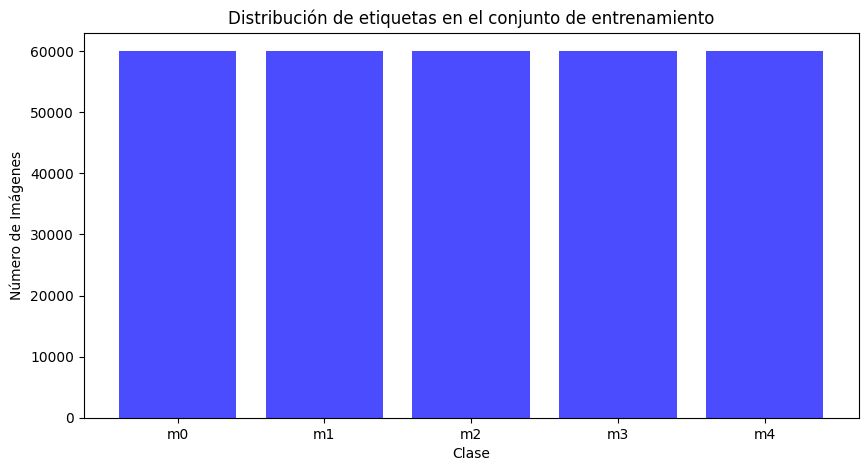

In [29]:
#Distribución de etiquetas en entrenamiento
plotDistribution(train_label_distribution, "Distribución de etiquetas en el conjunto de entrenamiento")

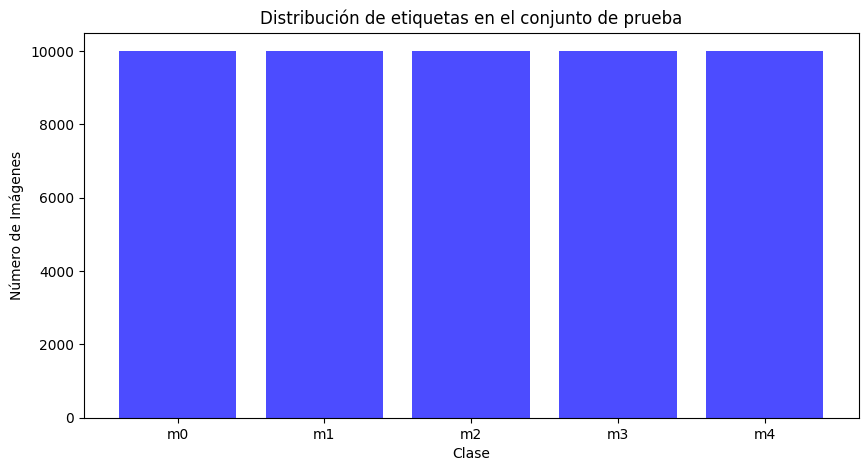

In [30]:
#Distribución de etiquetas en prueba
plotDistribution(test_label_distribution, "Distribución de etiquetas en el conjunto de prueba")

In [31]:
#Resultados a documentar
{
    "Resolución única de entrenamiento": unique_train_resolutions,
    "Resolución única de prueba": unique_test_resolutions,
    "Distribución de entrenamiento": train_label_distribution,
    "Distribución de prueba": test_label_distribution
}

{'Resolución única de entrenamiento': array([[28, 28]]),
 'Resolución única de prueba': array([[28, 28]]),
 'Distribución de entrenamiento': Counter({'m0': 60000,
          'm1': 60000,
          'm2': 60000,
          'm3': 60000,
          'm4': 60000}),
 'Distribución de prueba': Counter({'m0': 10000,
          'm1': 10000,
          'm2': 10000,
          'm3': 10000,
          'm4': 10000})}

El análisis exploratorio realizado sobre el conjunto de datos revela que todas las imágenes tienen una resolución de 28x28 píxeles, lo que es típico para conjuntos de datos derivados de MNIST. En cuanto a la distribución de las clases, tanto en el conjunto de entrenamiento como en el de prueba, se observa que el dataset está perfectamente balanceado. Cada clase (m0, m1, m2, m3, m4) cuenta con exactamente 60000 imágenes en el conjunto de entrenamiento y 10000 imágenes en el conjunto de prueba. Esta uniformidad en la distribución asegura que no haya sesgo hacia ninguna clase específica, lo que es ideal para entrenar modelos de aprendizaje automático, ya que permite que el modelo aprenda de manera equitativa todas las clases presentes en el dataset.

# Preprocesamiento de las imágenes

Antes de entrenar los modelos, es importante preprocesar las imágenes para que estén en el formato adecuado. 
El preprocesamiento incluye los siguientes pasos:

1. **Normalización**: Escalar los valores de los píxeles de las imágenes a un rango de 0 a 1 dividiendo por 255.
2. **Reshape**: Dado que las imágenes son de 28x28 píxeles y en escala de grises, las remodelamos a un formato adecuado para alimentar en una CNN, que sería `(28, 28, 1)`.
3. **Codificación de Etiquetas**: Convertir las etiquetas a un formato one-hot encoding.
4. **División del Conjunto de Datos**: Dividir los datos en conjuntos de entrenamiento, validación y prueba.

In [36]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [39]:
#Mapeo de etiquetas de cadena a enteros
label_map = {'m0': 0, 'm1': 1, 'm2': 2, 'm3': 3, 'm4': 4}
train_labels_int = [label_map[label] for label in train_labels]
test_labels_int = [label_map[label] for label in test_labels]


In [40]:
#Convertir las imágenes en matrices numpy y aplicar el preprocesamiento
def loadImagesAndProcess(image_paths, labels):
    images = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in image_paths]
    images = np.array(images).astype('float32') / 255.0  #Normalizar
    images = np.expand_dims(images, axis=-1)  #Reshape
    labels = to_categorical(labels)  #One-hot encoding de las etiquetas
    return images, labels

In [41]:
#Cargar y procesar imágenes de entrenamiento y prueba con etiquetas convertidas a enteros
train_images_processed, train_labels_processed = loadImagesAndProcess(train_images, train_labels_int)
test_images_processed, test_labels_processed = loadImagesAndProcess(test_images, test_labels_int)

In [42]:
#Dividir el conjunto de entrenamiento en entrenamiento y validación
train_images_final, val_images_final, train_labels_final, val_labels_final = train_test_split(
    train_images_processed, train_labels_processed, test_size=0.2, random_state=42)

In [43]:
print(f"Conjunto de entrenamiento: {train_images_final.shape}, {train_labels_final.shape}")
print(f"Conjunto de validación: {val_images_final.shape}, {val_labels_final.shape}")
print(f"Conjunto de prueba: {test_images_processed.shape}, {test_labels_processed.shape}")

Conjunto de entrenamiento: (240000, 28, 28, 1), (240000, 5)
Conjunto de validación: (60000, 28, 28, 1), (60000, 5)
Conjunto de prueba: (50000, 28, 28, 1), (50000, 5)


# Modelos de Deep Learning para Imágenes

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Modelo 1: CNN Básico

Este modelo cuenta con:
- 2 capas convolucionales seguidas de capas de pooling.
- 1 capa fully connected antes de la capa de salida.
- Función de activación ReLU y softmax en la capa de salida.

In [33]:
#Modelo 1: CNN Básico
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
#Entrenar el Modelo 1
history1 = model1.fit(train_images_final, train_labels_final, epochs=10, validation_data=(val_images_final, val_labels_final))

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 110s 14ms/step - accuracy: 0.7572 - loss: 0.5895 - val_accuracy: 0.8776 - val_loss: 0.3153
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 102s 14ms/step - accuracy: 0.9340 - loss: 0.1798 - val_accuracy: 0.9642 - val_loss: 0.1051
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 107s 14ms/step - accuracy: 0.9602 - loss: 0.1147 - val_accuracy: 0.9707 - val_loss: 0.0847
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 100s 13ms/step - accuracy: 0.9683 - loss: 0.0896 - val_accuracy: 0.9746 - val_loss: 0.0719
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 102s 14ms/step - accuracy: 0.9742 - loss: 0.0712 - val_accuracy: 0.9674 - val_loss: 0.0887
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 100s 13ms/step - accuracy: 0.9785 - loss: 0.0602 - val_accuracy: 0.9698 - val_loss: 0.0848
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 108s 14ms/step - accuracy: 0.9802 - loss: 0.0549 - val_accuracy: 0.9675 - val_loss: 0.0940
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 120s 16ms/step - accuracy: 

## Modelo 2: CNN Más Profundo

Este modelo incluye:
- 4 capas convolucionales con más filtros.
- Capas de pooling intercaladas y dropout para prevenir el sobreajuste.
- 2 capas fully connected antes de la capa de salida.
- Función de activación ReLU y softmax en la capa de salida.

In [47]:
#Modelo 2: CNN Más Profundo
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [48]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
#Entrenar el Modelo 2
history2 = model2.fit(train_images_final, train_labels_final, epochs=10, validation_data=(val_images_final, val_labels_final))

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 223s 28ms/step - accuracy: 0.7843 - loss: 0.5191 - val_accuracy: 0.9554 - val_loss: 0.1213
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 244s 32ms/step - accuracy: 0.9545 - loss: 0.1306 - val_accuracy: 0.9736 - val_loss: 0.0795
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 220s 29ms/step - accuracy: 0.9683 - loss: 0.0916 - val_accuracy: 0.9763 - val_loss: 0.0649
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 190s 25ms/step - accuracy: 0.9726 - loss: 0.0808 - val_accuracy: 0.9866 - val_loss: 0.0382
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 204s 27ms/step - accuracy: 0.9808 - loss: 0.0595 - val_accuracy: 0.9721 - val_loss: 0.0814
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 213s 28ms/step - accuracy: 0.9831 - loss: 0.0516 - val_accuracy: 0.9872 - val_loss: 0.0359
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 181s 24ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9793 - val_loss: 0.0628
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 186s 25ms/step - accuracy: 

## Evaluación de los modelos

In [50]:
#Evaluar el Modelo 1 en el conjunto de prueba
test_loss_1, test_accuracy_1 = model1.evaluate(test_images_processed, test_labels_processed)
print(f'Modelo 1 - Precisión en el conjunto de prueba: {test_accuracy_1:.4f}')


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9716 - loss: 0.0874
Modelo 1 - Precisión en el conjunto de prueba: 0.9788


In [51]:
#Evaluar el Modelo 2 en el conjunto de prueba
test_loss_2, test_accuracy_2 = model2.evaluate(test_images_processed, test_labels_processed)
print(f'Modelo 2 - Precisión en el conjunto de prueba: {test_accuracy_2:.4f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9735 - loss: 0.0778
Modelo 2 - Precisión en el conjunto de prueba: 0.9770


In [52]:
#Comparación de los modelos
if test_accuracy_1 > test_accuracy_2:
    print("El Modelo 1 es el mejor con una precisión de {:.4f}".format(test_accuracy_1))
else:
    print("El Modelo 2 es el mejor con una precisión de {:.4f}".format(test_accuracy_2))

El Modelo 1 es el mejor con una precisión de 0.9788
